In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#tf.__version__

In [2]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
print(y_train)

[5 0 4 ... 5 6 8]


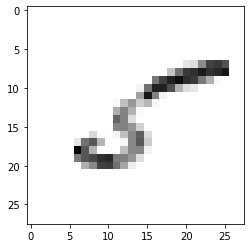

In [4]:
plt.imshow(x_train[11],cmap=plt.cm.binary)

In [5]:
model=models.Sequential()
#input layer
model.add(layers.Flatten())
#Dense layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#output layer
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))
#value_loss,value_acc=model.evaluate(x_test,y_test)
#print(value_loss," ",value_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 263us/sample - loss: 0.3235 - acc: 0.9090 - val_loss: 0.1731 - val_acc: 0.9472
Epoch 2/3
60000/60000 [==============================] - 15s 257us/sample - loss: 0.1444 - acc: 0.9566 - val_loss: 0.1304 - val_acc: 0.9596
Epoch 3/3
60000/60000 [==============================] - 16s 269us/sample - loss: 0.1008 - acc: 0.9691 - val_loss: 0.1079 - val_acc: 0.9658


10000/10000 - 1s - loss: 0.1079 - acc: 0.9658


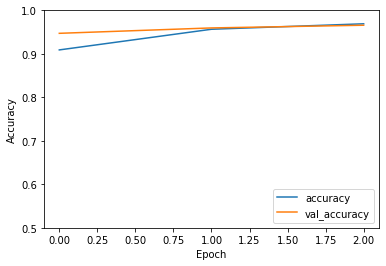

In [7]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(x_test,y_test, verbose=2)